Смирнов Алексей группа 18 ИВТ 2 Лабораторная № 3 вариант № 18

In [370]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr

warnings.filterwarnings("ignore")

In [343]:
data = pd.read_table('auto-mpg.data.txt', sep = '\s+', header=None, names=['mpg','cylinders','displacement',
                                                                           'horsepower','weight','acceleration',
                                                                          'model year','origin','car name'])
data = data.replace('?', np.NaN)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

In [344]:
dataTemp = [i.partition(' ')[0] for i in data['car name']]
dataTemp = pd.DataFrame({'mark':dataTemp})
dataTemp

,mark
0,chevrolet
1,buick
2,plymouth
3,amc
4,ford
...,...
393,ford
394,vw
395,dodge
396,ford


In [345]:
temp =pd.DataFrame({'model':[i.partition(' ')[2] for i in data['car name']]})
temp

,model
0,chevelle malibu
1,skylark 320
2,satellite
3,rebel sst
4,torino
...,...
393,mustang gl
394,pickup
395,rampage
396,ranger


In [346]:
tempHorse = data['horsepower'].astype('float64')
tempHorse

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [347]:
del data['car name']
del data['horsepower']
data = pd.concat([data, dataTemp, temp, tempHorse], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mark          398 non-null    object 
 8   model         398 non-null    object 
 9   horsepower    392 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 31.2+ KB


mpg: расход бензина

cylinders: количество цилиндров в двигателе

displacement: объем двигателя

horsepower: мощность в лошадиных силах

weight: вес

acceleration: ускорение

model year: год выпуска

origin: происхождение

mark: марка

model: модель

### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [348]:
data.shape

(398, 10)

In [349]:
data = data.drop_duplicates()

In [350]:
data.shape

(398, 10)

### 3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [351]:
columnsNum = [i for i in data.columns if data[i].dtype.name != 'object']
columnsCat = [i for i in data.columns if data[i].dtype.name == 'object']
columnsNum

['mpg',
 'cylinders',
 'displacement',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'horsepower']

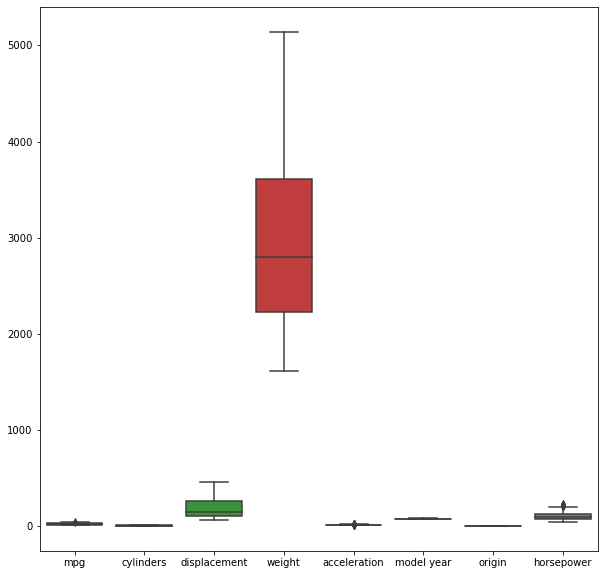

In [352]:
plt.figure(figsize=(10,10))
sns.boxplot(data = data[columnsNum])

In [353]:
scaler = MinMaxScaler() 
data[columnsNum] = scaler.fit_transform(data[columnsNum]) 
data

,mpg,cylinders,displacement,weight,acceleration,model year,origin,mark,model,horsepower
0,0.239362,1.0,0.617571,0.536150,0.238095,0.0,0.0,chevrolet,chevelle malibu,0.456522
1,0.159574,1.0,0.728682,0.589736,0.208333,0.0,0.0,buick,skylark 320,0.646739
2,0.239362,1.0,0.645995,0.516870,0.178571,0.0,0.0,plymouth,satellite,0.565217
3,0.186170,1.0,0.609819,0.516019,0.238095,0.0,0.0,amc,rebel sst,0.565217
4,0.212766,1.0,0.604651,0.520556,0.148810,0.0,0.0,ford,torino,0.510870
...,...,...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.333711,0.452381,1.0,0.0,ford,mustang gl,0.217391
394,0.930851,0.2,0.074935,0.146583,0.988095,1.0,0.5,vw,pickup,0.032609
395,0.611702,0.2,0.173127,0.193365,0.214286,1.0,0.0,dodge,rampage,0.206522
396,0.505319,0.2,0.134367,0.286929,0.630952,1.0,0.0,ford,ranger,0.179348


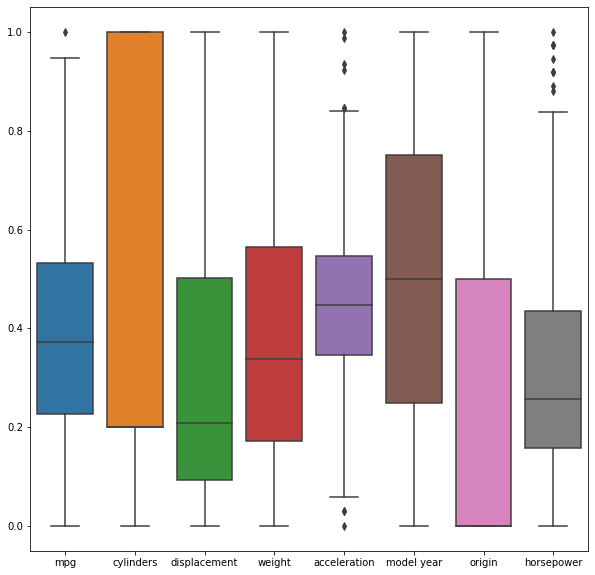

In [354]:
plt.figure(figsize=(10,10))
sns.boxplot(data = data[columnsNum])

### 4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [355]:
data.nunique()

mpg             129
cylinders         5
displacement     82
weight          351
acceleration     95
model year       13
origin            3
mark             37
model           300
horsepower       93
dtype: int64

In [356]:
dataCat = pd.get_dummies(data[columnsCat])
data.drop(columnsCat, axis=1, inplace=True)
data = pd.concat([dataCat, data] , axis=1)
data

,mark_amc,mark_audi,mark_bmw,mark_buick,mark_cadillac,mark_capri,mark_chevroelt,mark_chevrolet,mark_chevy,mark_chrysler,...,model_zephyr,model_zephyr 6,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0.239362,1.0,0.617571,0.536150,0.238095,0.0,0.0,0.456522
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0.159574,1.0,0.728682,0.589736,0.208333,0.0,0.0,0.646739
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0.239362,1.0,0.645995,0.516870,0.178571,0.0,0.0,0.565217
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0.186170,1.0,0.609819,0.516019,0.238095,0.0,0.0,0.565217
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0.212766,1.0,0.604651,0.520556,0.148810,0.0,0.0,0.510870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0.478723,0.2,0.186047,0.333711,0.452381,1.0,0.0,0.217391
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0.930851,0.2,0.074935,0.146583,0.988095,1.0,0.5,0.032609
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0.611702,0.2,0.173127,0.193365,0.214286,1.0,0.0,0.206522
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0.505319,0.2,0.134367,0.286929,0.630952,1.0,0.0,0.179348


### 5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

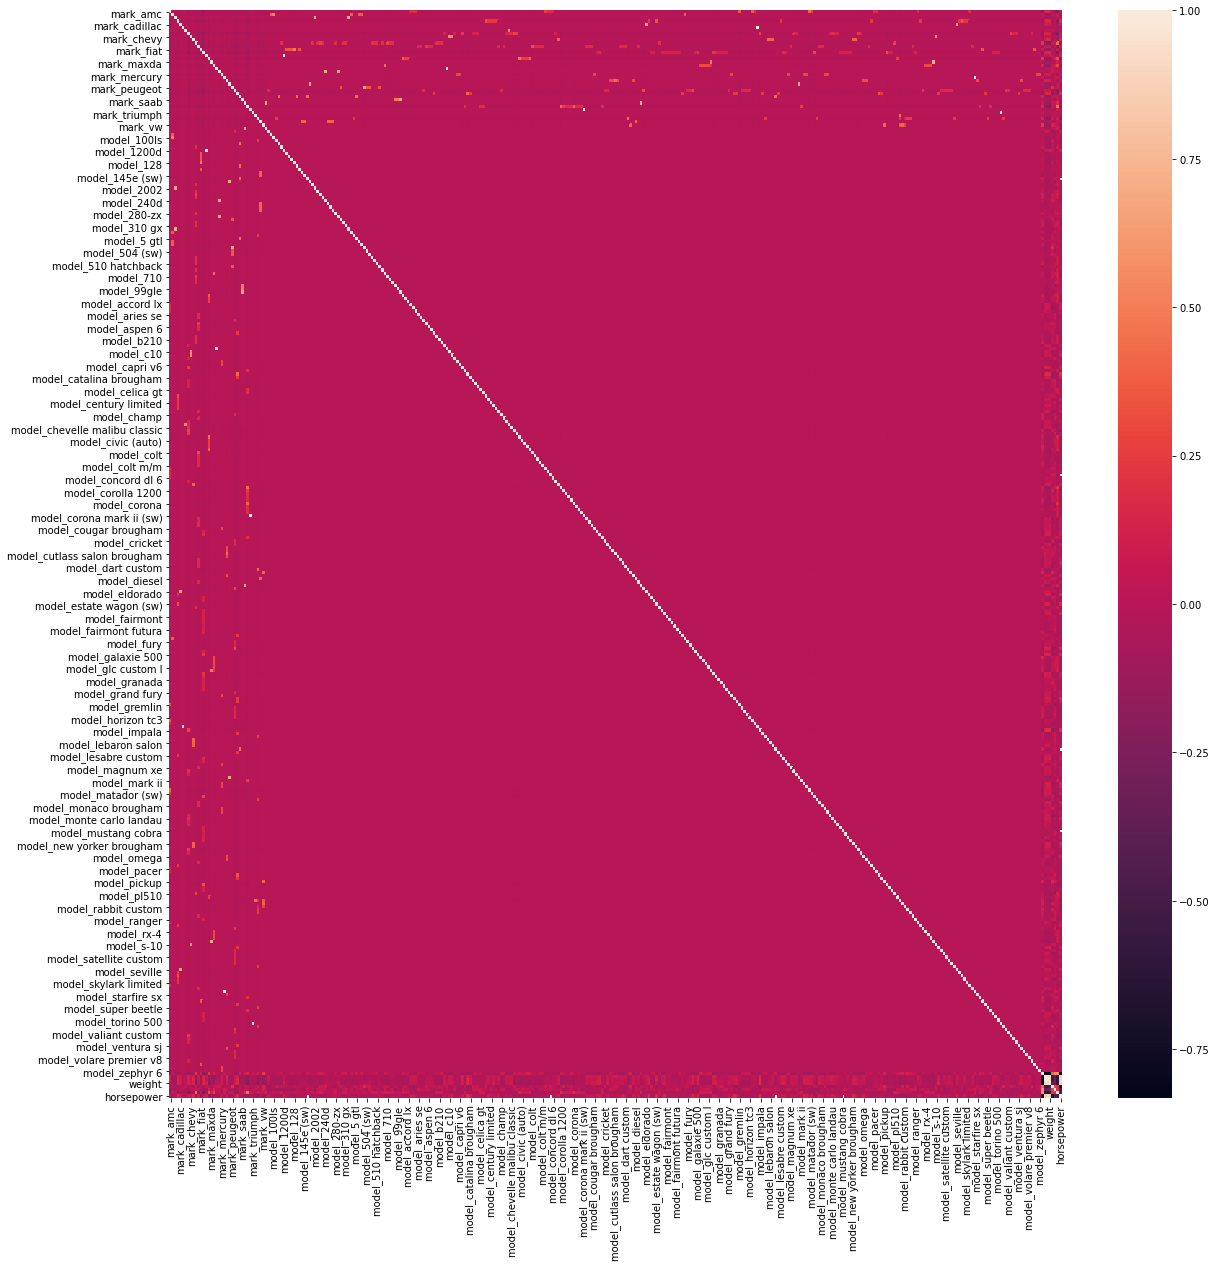

In [357]:
corr_matrix = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix)

### 6.	Заполните пропущенные значения в данных

In [358]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Columns: 345 entries, mark_amc to horsepower
dtypes: float64(8), uint8(337)
memory usage: 159.0 KB


In [364]:
data = data.sort_values('displacement')
data.fillna(method ='bfill', inplace = True)
data.sort_index(inplace=True)

### 7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [367]:
x, y = data.drop(['mpg'], axis=1), data['mpg']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 123)

regLin = linear_model.LinearRegression()
regLin.fit(x_train,y_train)
predRegLin = regLin.predict(x_test)
print(predRegLin - y_test)

150   -4.518429e+12
42    -1.554311e+11
120    1.596992e+12
102   -6.520929e+10
293    6.313892e-03
           ...     
383   -1.094114e-01
152    4.414796e+11
80    -3.924645e+09
117   -9.192812e+11
156    1.750410e-02
Name: mpg, Length: 160, dtype: float64


In [368]:
pearsonCorr, pearsonCorrP = pearsonr(predRegLin, y_test)
spearmanrCorr, spearmanrCorrP = spearmanr(predRegLin, y_test)
print(f'pearson correlation: {pearsonCorr}\t p: {pearsonCorrP}\n')
print(f'spearmanr correlation: {spearmanrCorr}\t p: {spearmanrCorrP}\n')

pearson correlation: -0.03770442042897471	 p: 0.6359589976827374

spearmanr correlation: 0.07147903832989005	 p: 0.3690753700084173



In [375]:
regRid = linear_model.Ridge()
parameters = {'alpha': np.arange(0, 5, 0.02)}
grid = GridSearchCV(regRid, parameters)
grid.fit(x_train, y_train)
alphaBest = grid.best_estimator_.alpha
regRid = linear_model.Ridge(alpha = alphaBest)
regRid.fit(x_train,y_train)
regRidPred = regRid.predict(x_test)
print(regRidPred - y_test)

150    0.044021
42    -0.041337
120    0.074388
102    0.095676
293    0.070470
         ...   
383   -0.092809
152    0.060554
80     0.011617
117    0.030086
156   -0.004367
Name: mpg, Length: 160, dtype: float64


In [376]:
pearsonCorr, pearsonCorrP = pearsonr(regRidPred, y_test)
spearmanrCorr, spearmanrCorrP = spearmanr(regRidPred, y_test)
print(f'pearson correlation: {pearsonCorr}\t p: {pearsonCorrP}\n')
print(f'spearmanr correlation: {spearmanrCorr}\t p: {spearmanrCorrP}\n')

pearson correlation: 0.8899936623852138	 p: 9.208610145861337e-56

spearmanr correlation: 0.9162796695317573	 p: 1.140973059450438e-64

